# Description: This program uses the Moving Average Convergence/Divergence (MACD) crossover
To determine when to buy and sell stocks.

In [3]:
#Import the libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [4]:
#Store the data into a Pandas df
df = pd.read_csv('./Data/Stocks/aapl.us.txt')

#Set the date to be index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Selecting desired data between two time frames
df = df.loc['2017-04-15':'2017-08-24']
df.drop('OpenInt', inplace=True, axis=1)

#Show the data
df

,Date,Open,High,Low,Close,Volume
2017-04-17,2017-04-17,139.85,140.25,139.24,140.20,15807795
2017-04-18,2017-04-18,139.78,140.41,139.48,139.57,14228494
2017-04-19,2017-04-19,140.25,140.37,138.82,139.05,16712357
2017-04-20,2017-04-20,139.59,141.26,139.53,140.79,22650719
2017-04-21,2017-04-21,140.79,141.02,140.22,140.63,16824648
2017-04-24,2017-04-24,141.84,142.29,141.52,141.98,17318652
2017-04-25,2017-04-25,142.25,143.23,142.21,142.87,18890350
2017-04-26,2017-04-26,142.81,142.94,141.72,142.02,20251016
2017-04-27,2017-04-27,142.26,142.50,141.65,142.13,14373797
2017-04-28,2017-04-28,142.43,142.64,141.61,141.99,21104313


### Visually show the stock price

Text(0, 0.5, 'Price USD ($)')

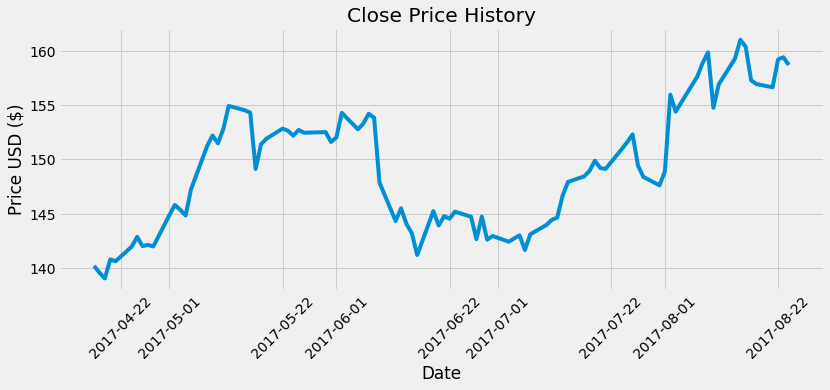

In [5]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label = 'Close')
plt.xticks(rotation = 45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')

### Calculating the MACD and signal line indicators:

In [6]:
#Calulate the short term exponential moving average (EMA)
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()

#Calulate the long term exponential moving average (EMA)
LongEMA = df.Close.ewm(span=26, adjust=False).mean()

#Calculate the MACD line
MACD = ShortEMA - LongEMA

#Calculate the signal line 
signal = MACD.ewm(span=9, adjust=False).mean()

### Plot the MACD and signal line

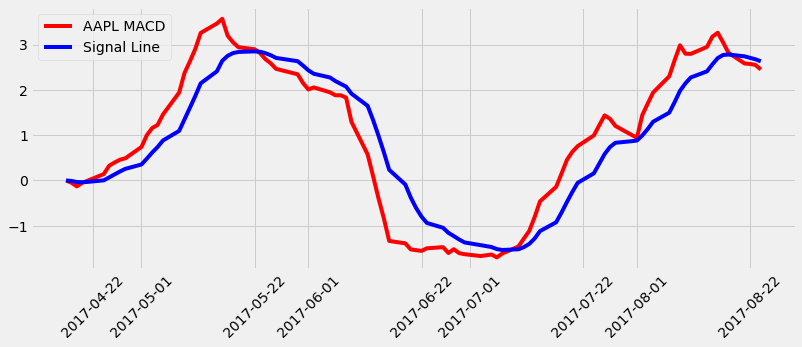

In [7]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'AAPL MACD', color = 'red')
plt.plot(df.index, signal, label = 'Signal Line', color = 'blue')
plt.xticks(rotation = 45)
plt.legend(loc = 'upper left')


In [8]:
#Create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal

#Show the data 
df

,Date,Open,High,Low,Close,Volume,MACD,Signal Line
2017-04-17,2017-04-17,139.85,140.25,139.24,140.20,15807795,0.000000,0.000000
2017-04-18,2017-04-18,139.78,140.41,139.48,139.57,14228494,-0.050256,-0.010051
2017-04-19,2017-04-19,140.25,140.37,138.82,139.05,16712357,-0.130540,-0.034149
2017-04-20,2017-04-20,139.59,141.26,139.53,140.79,22650719,-0.053149,-0.037949
2017-04-21,2017-04-21,140.79,141.02,140.22,140.63,16824648,-0.004673,-0.031294
2017-04-24,2017-04-24,141.84,142.29,141.52,141.98,17318652,0.141053,0.003175
2017-04-25,2017-04-25,142.25,143.23,142.21,142.87,18890350,0.324615,0.067463
2017-04-26,2017-04-26,142.81,142.94,141.72,142.02,20251016,0.396925,0.133356
2017-04-27,2017-04-27,142.26,142.50,141.65,142.13,14373797,0.457831,0.198251
2017-04-28,2017-04-28,142.43,142.64,141.61,141.99,21104313,0.489163,0.256433


### Create a function to signal when to buy and sell an asset 

In [9]:
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1

    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag !=1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)

        else:
            Buy.append(np.nan)
            Sell.append(np.nan)

    return(Buy, Sell)

### Create buy and sell column

In [10]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

#Show the data 
df

,Date,Open,High,Low,Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2017-04-17,2017-04-17,139.85,140.25,139.24,140.20,15807795,0.000000,0.000000,NaN,NaN
2017-04-18,2017-04-18,139.78,140.41,139.48,139.57,14228494,-0.050256,-0.010051,NaN,139.57
2017-04-19,2017-04-19,140.25,140.37,138.82,139.05,16712357,-0.130540,-0.034149,NaN,NaN
2017-04-20,2017-04-20,139.59,141.26,139.53,140.79,22650719,-0.053149,-0.037949,NaN,NaN
2017-04-21,2017-04-21,140.79,141.02,140.22,140.63,16824648,-0.004673,-0.031294,140.63,NaN
2017-04-24,2017-04-24,141.84,142.29,141.52,141.98,17318652,0.141053,0.003175,NaN,NaN
2017-04-25,2017-04-25,142.25,143.23,142.21,142.87,18890350,0.324615,0.067463,NaN,NaN
2017-04-26,2017-04-26,142.81,142.94,141.72,142.02,20251016,0.396925,0.133356,NaN,NaN
2017-04-27,2017-04-27,142.26,142.50,141.65,142.13,14373797,0.457831,0.198251,NaN,NaN
2017-04-28,2017-04-28,142.43,142.64,141.61,141.99,21104313,0.489163,0.256433,NaN,NaN


### Visually show the stock buy and sell signals 

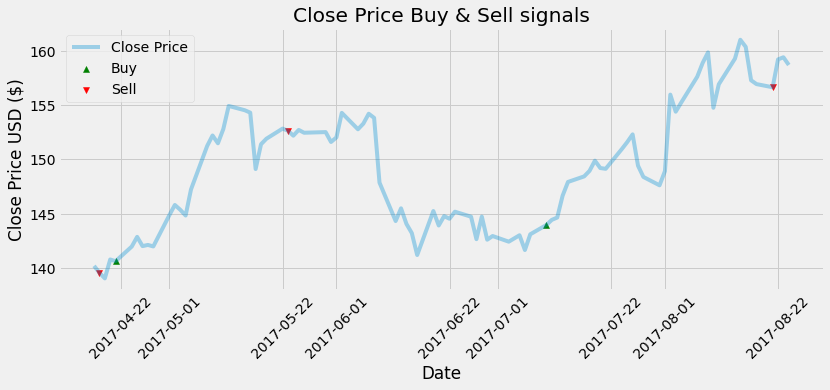

In [13]:
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy & Sell signals')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()